In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import json

import torch
from dataset.loader import DatasetLoader
from tokenizer import ByteLevelBPE

import sys
sys.path.append("..")
import config

import matplotlib.pyplot as plt

import importlib

/home/nad/studies/Transformer-Image-Captioning-IIW/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_size = config.BATCH_SIZE_TRAIN

# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

random.seed(42)

importlib.reload(config)

<module 'config' from '/home/nad/studies/Transformer-Image-Captioning-IIW/config.py'>

In [3]:
data_loader = DatasetLoader(dataset_type=config.DATASET, batch_size_train=1, batch_size_test=1, shuffle_test=True)
data_loader.load_data()

train_dataloader = data_loader.get_train_dataloader()
test_dataloader = data_loader.get_test_dataloader()

Loading DOCCI dataset...
DatasetDict({
    train: Dataset({
        features: ['image', 'description'],
        num_rows: 9647
    })
    test: Dataset({
        features: ['image', 'description'],
        num_rows: 5000
    })
    qual_dev: Dataset({
        features: ['image', 'description'],
        num_rows: 100
    })
    qual_test: Dataset({
        features: ['image', 'description'],
        num_rows: 100
    })
})


In [4]:
print(len(train_dataloader), len(test_dataloader))

9647 5000


/tmp/ipykernel_369628/3186784317.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  plt.imshow(np.array(train_sample['pixel_values'].squeeze().permute(1, 2, 0)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5528543].


{'pixel_values': tensor([[[[ 0.5022,  0.5022,  0.4851,  ...,  0.5536,  0.5536,  0.6049],
          [ 0.5193,  0.5193,  0.5022,  ...,  0.5878,  0.5707,  0.6221],
          [ 0.5193,  0.5193,  0.5022,  ...,  0.6049,  0.5878,  0.6563],
          ...,
          [ 0.0056, -0.0458, -0.0458,  ..., -2.1179, -2.1179, -2.1179],
          [ 0.0912,  0.0912,  0.0741,  ..., -2.1008, -2.1008, -2.1008],
          [-0.2856, -0.2684, -0.2171,  ..., -2.0665, -2.1008, -2.1008]],

         [[ 1.0455,  1.0455,  1.0455,  ...,  1.0455,  1.0630,  1.0630],
          [ 1.0630,  1.0630,  1.0630,  ...,  1.0630,  1.0805,  1.0805],
          [ 1.0630,  1.0630,  1.0630,  ...,  1.0980,  1.0980,  1.1155],
          ...,
          [ 0.0301, -0.0224, -0.0224,  ..., -2.0007, -2.0007, -2.0007],
          [ 0.1527,  0.1527,  0.1352,  ..., -1.9832, -2.0182, -2.0182],
          [-0.1450, -0.1099, -0.1099,  ..., -1.9657, -2.0182, -2.0182]],

         [[ 2.0300,  2.0300,  2.0300,  ...,  1.9254,  1.9254,  1.8034],
          [ 2

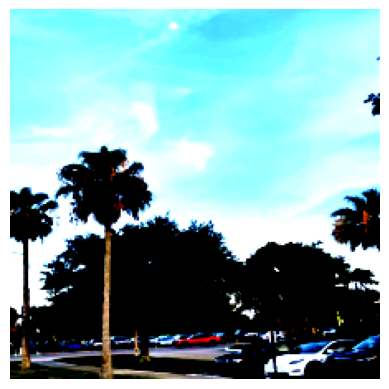

/tmp/ipykernel_369628/3186784317.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  plt.imshow(np.array(test_sample['pixel_values'].squeeze().permute(1, 2, 0)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5528543].


Description:
 ["A medium view of two parking lots and a couple of trees. To the right of the parking lot that is on the near side of the view, there are three cars parked. The car on the right is black, and it's an Infinity, while the car on the left is a BMW and also black. In between both cars, there is a white Tesla. In front of the cars there is a sidewalk, and to the left of the sidewalk there are two palm trees that have very long trunks and are a light brown. On the left side of the cars, there are two trees that are filled with dark green leaves. On the other side of the trees, there is an orange car driving along a road towards the left. Behind the orange car, there is a parking lot that is filled with cars. It is daytime, as a baby blue sky can be seen, and throughout the sky, thin white clouds are visible. Along the top portion of the sky and along its center, a small portion of the moon can be seen."]


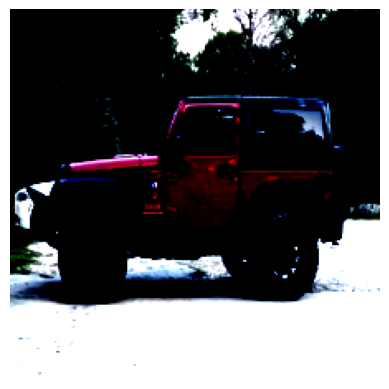

Description:
 ["A two-door Jeep Wrangler is seen from the driver's side parked on a dusty gravel area surrounded by trees, with a white car in the background. The Jeep is deep red with dark tinted windows and all black accessories. The hardtop roof is black, and the Jeep has a 6-inch lift with 33-inch tires on the black rims. It also has an extended grill guard on the front bumper. The Wrangler is clean enough to see the sky and trees reflected in the back driver's side window. A small area of sky is seen in the center between several tall trees in the background. It's not brightly sunny, but it is daytime."]


In [5]:
train_sample = next(iter(train_dataloader))
print(train_sample)
plt.imshow(np.array(train_sample['pixel_values'].squeeze().permute(1, 2, 0)))
plt.axis('off')
plt.show()
print('Description:\n', train_sample['description'])

test_sample = next(iter(test_dataloader))
plt.imshow(np.array(test_sample['pixel_values'].squeeze().permute(1, 2, 0)))
plt.axis('off')
plt.show()
print('Description:\n', test_sample['description'])

In [ ]:
lengths = []
descriptions = []

for sample in train_dataloader:
    desc = sample['description'][0]
    lengths.append(len(desc))
    descriptions.append(desc)

for sample in test_dataloader:
    desc = sample['description'][0]
    lengths.append(len(desc))
    descriptions.append(desc)

In [ ]:
# Decide on vocab size based on count of unique words in the dataset
print(set(" ".join(descriptions).split()))
count_unique_words = len(set(" ".join(descriptions).split()))
print(f"Count of unique words in the dataset: {count_unique_words}")

file_path = os.path.join(config.TOKENIZER_DATA_PATH, 'count_unique_words_{}_{}.json'.format(config.TOKENIZER_FILENAME_PREFIX, config.DATASET))
with open(file_path, 'w') as f:
    json.dump({'count_unique_words': count_unique_words}, f)

{'buttered', 'photo', 'mattress.', 'campfire.', 'effort', 'embrace', 'BILLOWING', 'complaints.', 'load.', 'headband', 'clearing.', 'crossed', 'flies', 'tsunami.', 'temperature', 'building,', 'tons', 'cones.', 'veggies', 'draped', 'Female', 'reagarding', 'hats', 'fence', 'sword.', 'brochures.', 'fire.', 'foods', "calzone's", 'cigarettes', 'Algerie', 'Greene', 'papers', 'Waterway', 'cloths', 'shore.', 'drainpipe.', 'elephant/', 'Vegetable', 'innertube', 'grate.', 'LOG', 'smeared', 'practiced', 'ina', 'antilope', 'Extra', 'grasp', 'antelopes', 'appears', 'stealth', 'cheering', 'damaged', 'Newport', 'cat', 'winds', 'broccoli', 'tea', 'Shears', 'coaching', 'sidetrack', 'rail.', 'players.', 'signifying', 'topping', 'home', 'ice-cream', 'flowery', 'poles.', 'shallow', 'Intersection', 'SOMEONE', 'console.', 'cheer.', 'cap,', 'windows,', 'shiny', 'jockeys', 'sreen', 'sauces,', 'RV.', 'calm,', 'this', 'skate', 'named', 'chaird.', 'brushy', 'racket.', 'security', 'class', 'Costumed', 'Galactica',

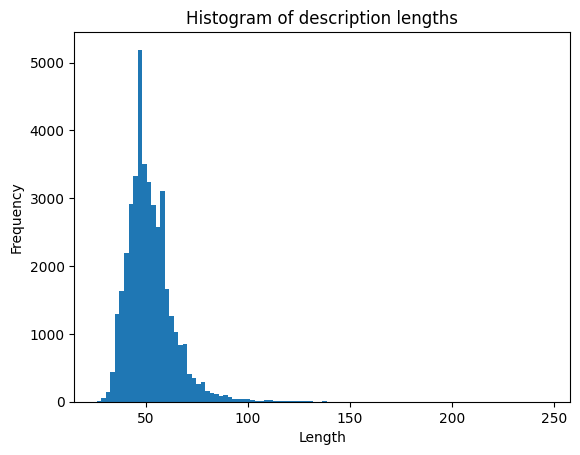

Length mean:  52.040563894923956
Length median:  50.0
Length std:  11.718708310632952
Length max (90th percentile):  65
Length max (92nd percentile):  67
Length max (95th percentile):  72
Length max (99th percentile):  91


In [ ]:
plt.hist(lengths, bins=100)
plt.title("Histogram of description lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

mean = np.mean(lengths)
median = np.median(lengths)
std = np.std(lengths)
max_length_90 = int(np.percentile(lengths, 90))
max_length_92 = int(np.percentile(lengths, 92))
max_length_95 = int(np.percentile(lengths, 95))
max_length_99 = int(np.percentile(lengths, 99))
print('Length mean: ', mean)
print('Length median: ', median)
print('Length std: ', std)
print('Length max (90th percentile): ', max_length_90)
print('Length max (92nd percentile): ', max_length_92)
print('Length max (95th percentile): ', max_length_95)
print('Length max (99th percentile): ', max_length_99)

In [ ]:
with open(os.path.join(config.TOKENIZER_DATA_PATH, "description_stats_{}.json".format(config.DATASET)), "w") as f:
    json.dump({
        "mean": round(mean),
        "median": round(median),
        "std": round(std),
        "max_90": max_length_90,
        "max_92": max_length_92,
        "max_95": max_length_95,
        "max_99": max_length_99
    }, f)

In [ ]:
special_tokens = [config.SpecialTokens.PAD, config.SpecialTokens.BOS, config.SpecialTokens.EOS]
bpe_tokenizer = ByteLevelBPE(special_tokens=special_tokens)

bpe_tokenizer.train(descriptions, vocab_size=config.TOKENIZER_TRAIN_VOCAB_SIZE, verbose=True)
print(bpe_tokenizer)
bpe_tokenizer.save(folder=config.TOKENIZER_DATA_PATH, filename_prefix=config.TOKENIZER_FILENAME_PREFIX)

special_tokens_dict: {<SpecialTokens.PAD: '<pad>'>: 0, <SpecialTokens.BOS: '<bos>'>: 1, <SpecialTokens.EOS: '<eos>'>: 2}


Vocab size (with special tokens): 8577
Made 8318 merges
ByteLevelBPE(vocab_size=8577)


In [ ]:
max_desc_length_tokens = data_loader.get_max_description_length_in_tokens(tokenizer=bpe_tokenizer, descriptions=descriptions, max_sequence_length=-1)

In [ ]:
# export json for setting MAX_DESC_LENGTH=max_desc_length in config later
with open(os.path.join(config.TOKENIZER_DATA_PATH, "max_desc_length_{}.json".format(config.DATASET)), "w") as f:
    json.dump({"MAX_DESC_LENGTH": max_desc_length_tokens}, f)

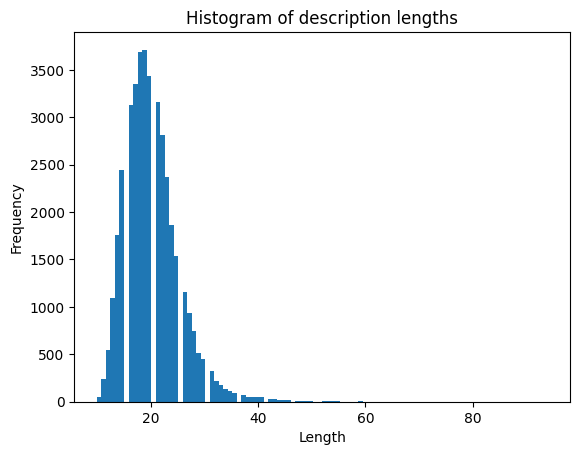

Length mean:  20.30883369543749
Length median:  20.0
Length std:  5.203511381348838
Length max (90th percentile):  27
Length max (92nd percentile):  27
Length max (95th percentile):  29
Length max (99th percentile):  37


In [ ]:
token_lengths = []
for desc in descriptions:
    encoded = bpe_tokenizer.encode(desc, max_seq_length=-1, verbose=False)['input_ids']
    token_lengths.append(len(encoded))

plt.hist(token_lengths, bins=100)
plt.title("Histogram of description lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

mean = np.mean(token_lengths)
median = np.median(token_lengths)
std = np.std(token_lengths)
max_length_90 = int(np.percentile(token_lengths, 90))
max_length_92 = int(np.percentile(token_lengths, 92))
max_length_95 = int(np.percentile(token_lengths, 95))
max_length_99 = int(np.percentile(token_lengths, 99))
print('Length mean: ', mean)
print('Length median: ', median)
print('Length std: ', std)
print('Length max (90th percentile): ', max_length_90)
print('Length max (92nd percentile): ', max_length_92)
print('Length max (95th percentile): ', max_length_95)
print('Length max (99th percentile): ', max_length_99)

In [ ]:
with open(os.path.join(config.TOKENIZER_DATA_PATH, "description_token_stats_{}.json".format(config.DATASET)), "w") as f:
    json.dump({
        "mean": round(mean),
        "median": round(median),
        "std": round(std),
        "max_90": max_length_90,
        "max_92": max_length_92,
        "max_95": max_length_95,
        "max_99": max_length_99
    }, f)

In [ ]:
bpe_tokenizer.load(folder=config.TOKENIZER_DATA_PATH, filename_prefix=config.TOKENIZER_FILENAME_PREFIX)

samples = 10

for batch in train_dataloader:
    if samples < 0:
        break
    desc_batch = batch['description']
    for desc in desc_batch:
        print('Description: ', desc)
        print('Tokenized: ', bpe_tokenizer.tokenize(desc))
        encoded = bpe_tokenizer.encode(desc, max_seq_length=len(bpe_tokenizer.tokenize(desc))+2, verbose=True)['input_ids']
        print(f'Encoded: {encoded}')
        decoded = bpe_tokenizer.decode(encoded)
        print(f'Decoded: {decoded}\n')
        decoded_stripped = bpe_tokenizer.strip(decoded)
        # cut desc to be the same length as decoded_stripped
        desc_cut = desc[:len(decoded_stripped)]
        assert desc_cut == decoded_stripped, "Decoded text does not match original!"
    samples -= 1

Description:  A woman holding a small item in a field.
Tokenized:  ['A', 'Ġw', 'oman', 'Ġholding', 'Ġa', 'Ġsmall', 'Ġ', 'ite', 'm', 'Ġin', 'Ġa', 'Ġfield', '.']
Encoded: tensor([   1,   68,  266, 1140,  362,  259,  432,   35,  334,  112,  281,  259,
         393,   49,    2])
Decoded: <bos>A woman holding a small item in a field.<eos>

Description:  Man posing in front of a pair of giraffes in background.
Tokenized:  ['Man', 'Ġposing', 'Ġin', 'Ġfro', 'nt', 'Ġof', 'Ġa', 'Ġpair', 'Ġof', 'Ġg', 'i', 'ra', 'ff', 'es', 'Ġin', 'Ġback', 'g', 'ro', 'und', '.']
Encoded: tensor([   1,  742,  909,  281, 2025, 4966,  275,  259,  841,  275,  289,  108,
         297,  364,  303,  281,  495,  106,  278,  366,   49,    2])
Decoded: <bos>Man posing in front of a pair of giraffes in background.<eos>

Description:  A kitchen being remodeled covered in lots of clutter.
Tokenized:  ['A', 'Ġkit', 'c', 'he', 'n', 'Ġbeing', 'Ġrem', 'o', 'de', 'le', 'd', 'Ġco', 'v', 'er', 'ed', 'Ġin', 'Ġl', 'ot', 's', 'Ġof', 'Ġc